In [1346]:
from Machine import Machine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [1347]:
# Load data
train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')
targets = train_data['Transported']
df = pd.concat([train_data.drop('Transported', axis=1), test_data], axis=0)

In [1348]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic


In [1349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


In [1350]:
def analyseFrequencies(df, columns):
    for column in columns:
        print(f'>> COLUMN: {column}')
        print(df[column].value_counts())
        print('--------------------------------\n')


columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']

analyseFrequencies(df, columns)

>> COLUMN: HomePlanet
Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64
--------------------------------

>> COLUMN: CryoSleep
False    8079
True     4581
Name: CryoSleep, dtype: int64
--------------------------------

>> COLUMN: Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64
--------------------------------

>> COLUMN: VIP
False    12401
True       273
Name: VIP, dtype: int64
--------------------------------

>> COLUMN: RoomService
0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64
--------------------------------

>> COLUMN: FoodCourt
0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, d

In [1351]:
df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [1352]:
df['Group'] = df['PassengerId'].astype(str).apply(lambda x: x.split('_')[0])
df['GroupSize'] = df['Group'].map(df['Group'].value_counts()).astype(np.uint8)

In [1353]:
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0004,1
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,0005,1
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,0006,2
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,0006,2
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,0007,1
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,0008,3


In [1354]:
df = pd.get_dummies(df, prefix="HP", prefix_sep="_", columns=['HomePlanet'])


In [1355]:
df['CryoSleep'] = df['CryoSleep'].apply(lambda x: 1 if x else 0 )

In [1356]:
df['Cabin_Deck'] = df['Cabin'].apply(lambda x: x.split("/")[0] if isinstance(x, str) else x)
df['Cabin_Num']  = df['Cabin'].apply(lambda x: x.split("/")[1] if isinstance(x, str) else x)
df['Cabin_Side'] = df['Cabin'].apply(lambda x: x.split("/")[2] if isinstance(x, str) else x)

In [1357]:
df['Cabin_Num'].fillna(method='ffill', inplace=True)
df["Cabin_Num"].isna().sum()

0

In [1358]:
df

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,GroupSize,HP_Earth,HP_Europa,HP_Mars,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0001,1,0,1,0,B,0,P
1,0002_01,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0002,1,1,0,0,F,0,S
2,0003_01,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0003,2,0,1,0,A,0,S
3,0003_02,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0003,2,0,1,0,A,0,S
4,0004_01,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0004,1,1,0,0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266,2,1,0,0,G,1496,S
4273,9269_01,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269,1,1,0,0,NaN,1496,NaN
4274,9271_01,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271,1,0,0,1,D,296,P
4275,9273_01,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273,1,0,1,0,D,297,P


In [1359]:
columns = ["Cabin_Deck", "Cabin_Num", "Cabin_Side"]
analyseFrequencies(df, columns)

>> COLUMN: Cabin_Deck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Cabin_Deck, dtype: int64
--------------------------------

>> COLUMN: Cabin_Num
82      34
56      29
4       29
31      28
230     27
        ..
1853     1
1848     1
1847     1
1846     1
1890     1
Name: Cabin_Num, Length: 1894, dtype: int64
--------------------------------

>> COLUMN: Cabin_Side
S    6381
P    6290
Name: Cabin_Side, dtype: int64
--------------------------------



In [1360]:
df = pd.get_dummies(df, "Cabin", "_", columns=["Cabin_Deck"])
df["Cabin_Side"] = df["Cabin_Side"].apply(lambda x: 0 if x == "P" else 1)
df.drop("Cabin", axis=1, inplace=True)

In [1361]:
df["Cabin_Num"] = df["Cabin_Num"].astype(np.uint8)


In [1362]:
df = pd.get_dummies(df, "Dest", "_", columns=["Destination"])

In [1363]:
df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Dest_55 Cancri e,Dest_PSO J318.5-22,Dest_TRAPPIST-1e
0,0001_01,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,0,0,0,0,0,0,0,0,1
1,0002_01,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,0,1,0,0,0,0,1
2,0003_01,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,0,0,0,0,0,0,0,1
3,0003_02,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,0,0,0,0,0,0,0,1
4,0004_01,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,...,0,0,0,0,0,1,0,0,0,1
4273,9269_01,0,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,...,0,0,0,0,0,0,0,0,0,1
4274,9271_01,1,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,...,0,0,1,0,0,0,0,1,0,0
4275,9273_01,0,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,...,0,0,1,0,0,0,0,0,0,0


In [1364]:
df["VIP"] = df["VIP"].apply(lambda x: 0 if x else 1)

In [1365]:
print(df['Name'].isna().sum())
df['Name'] = df['Name'].astype(str).apply(lambda x: x.split()[0])
df['Name'].value_counts()

294


nan       294
Idace      16
Luise      16
Ale        15
Kaye       14
         ... 
Smark       1
Mureah      1
Grey        1
Pix         1
Perit       1
Name: Name, Length: 2884, dtype: int64

In [1366]:
df.drop("Name", axis=1, inplace=True)

In [1367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         12970 non-null  object 
 1   CryoSleep           12970 non-null  int64  
 2   Age                 12700 non-null  float64
 3   VIP                 12970 non-null  int64  
 4   RoomService         12707 non-null  float64
 5   FoodCourt           12681 non-null  float64
 6   ShoppingMall        12664 non-null  float64
 7   Spa                 12686 non-null  float64
 8   VRDeck              12702 non-null  float64
 9   Group               12970 non-null  object 
 10  GroupSize           12970 non-null  uint8  
 11  HP_Earth            12970 non-null  uint8  
 12  HP_Europa           12970 non-null  uint8  
 13  HP_Mars             12970 non-null  uint8  
 14  Cabin_Num           12970 non-null  uint8  
 15  Cabin_Side          12970 non-null  int64  
 16  Cabin

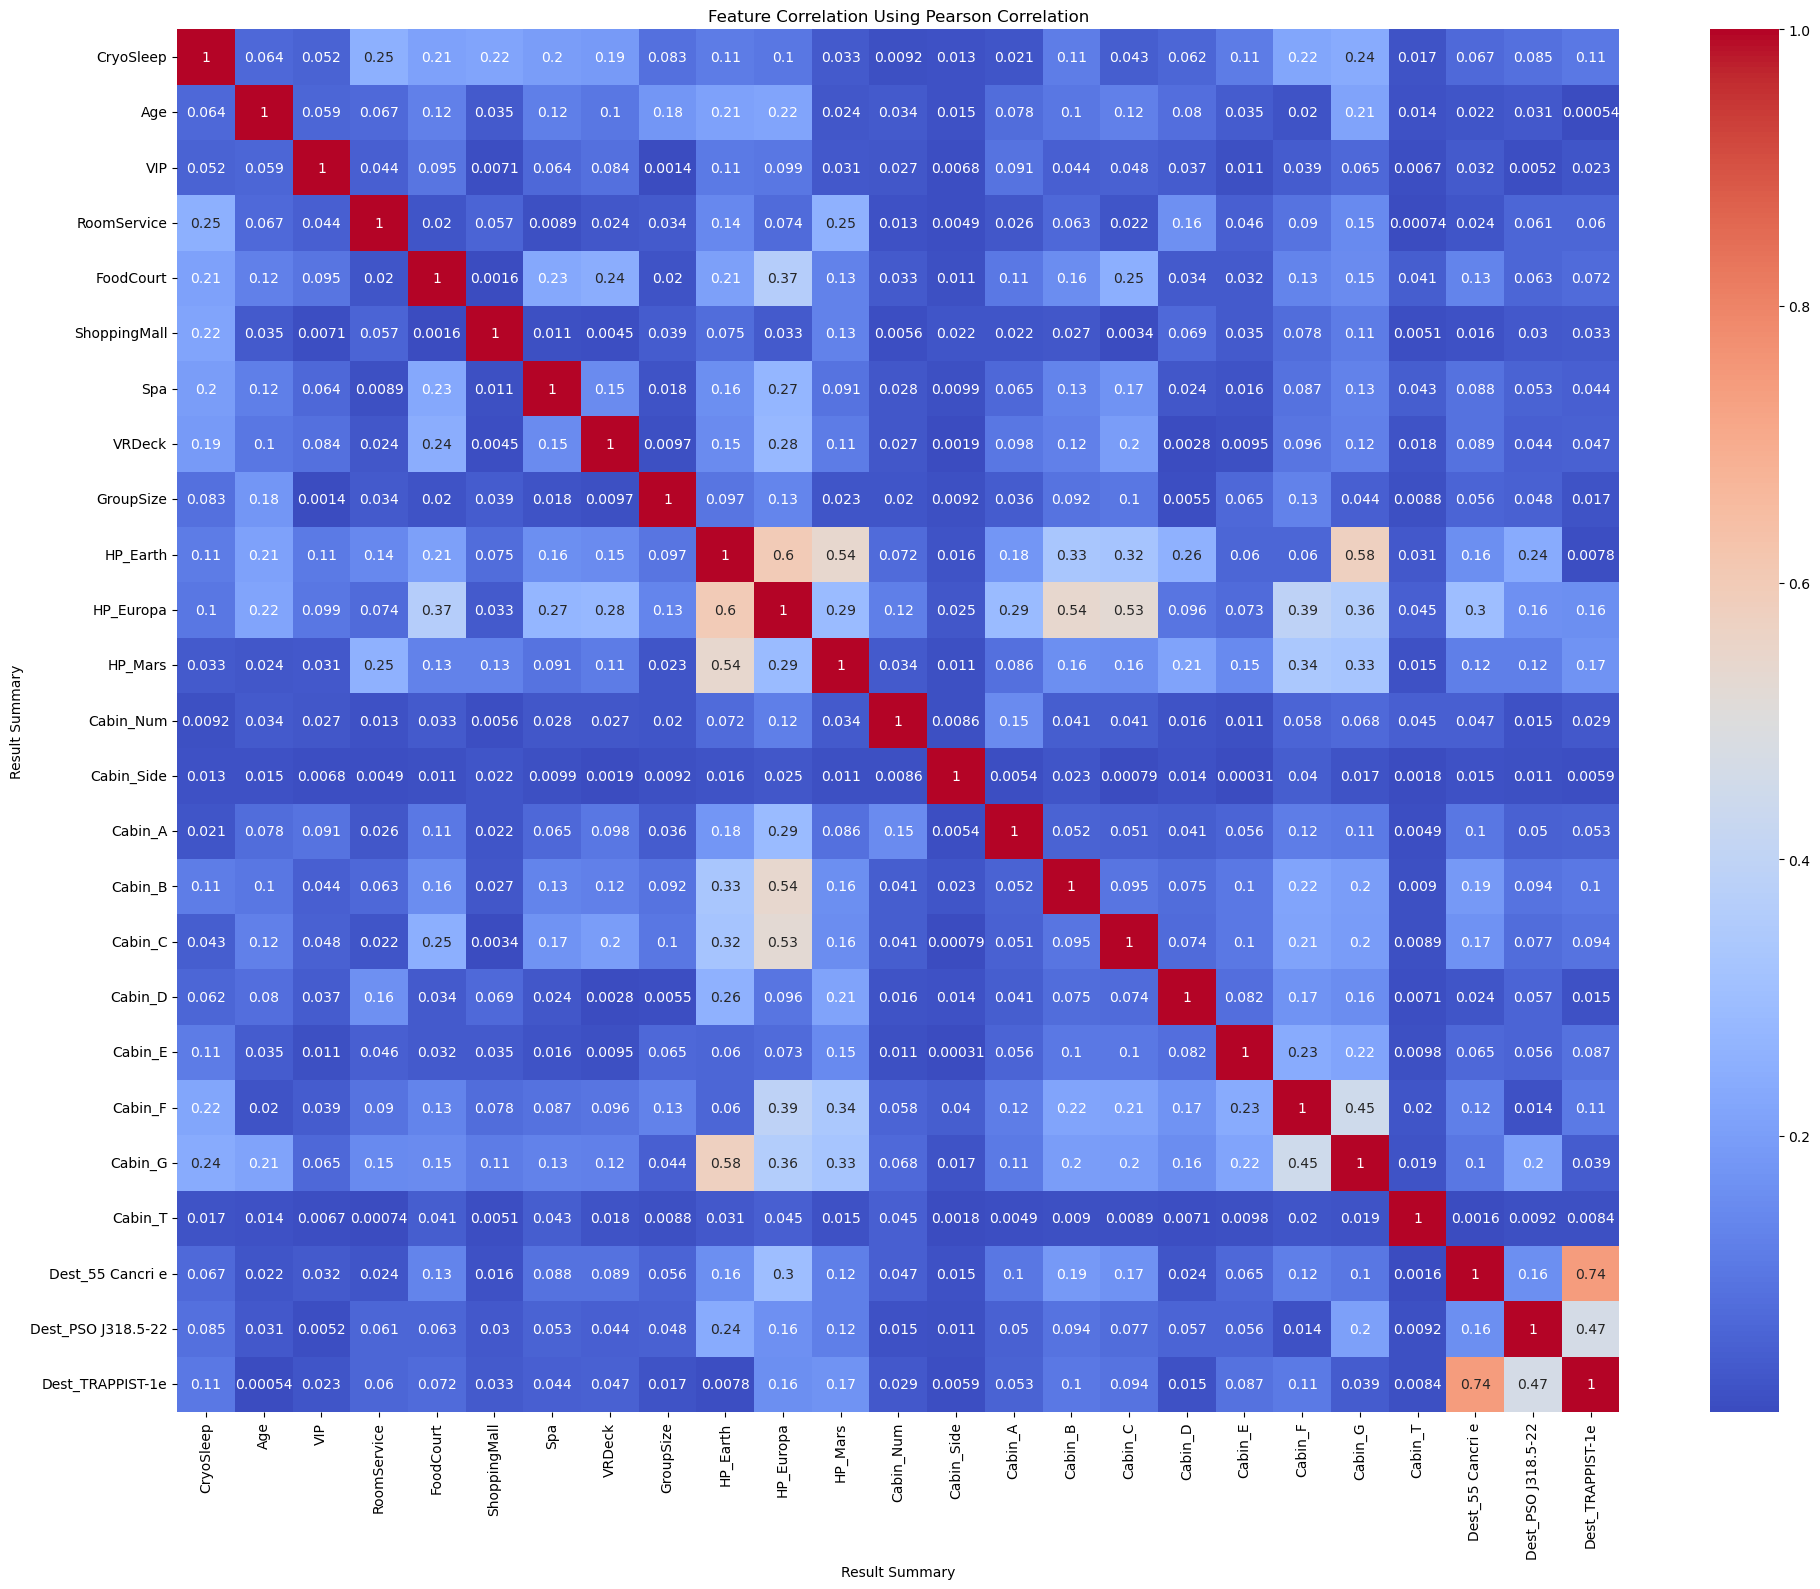

In [1368]:
corr_matrix = df.corr().abs()
fig= plt.figure(figsize = (20, 16))
ax=sns.heatmap(corr_matrix, cmap="coolwarm",annot=True)
ax.set(xlabel ="Result Summary", ylabel = "Result Summary", title ='Feature Correlation Using Pearson Correlation')
plt.tight_layout()

In [1369]:
df.isna().sum()

PassengerId             0
CryoSleep               0
Age                   270
VIP                     0
RoomService           263
FoodCourt             289
ShoppingMall          306
Spa                   284
VRDeck                268
Group                   0
GroupSize               0
HP_Earth                0
HP_Europa               0
HP_Mars                 0
Cabin_Num               0
Cabin_Side              0
Cabin_A                 0
Cabin_B                 0
Cabin_C                 0
Cabin_D                 0
Cabin_E                 0
Cabin_F                 0
Cabin_G                 0
Cabin_T                 0
Dest_55 Cancri e        0
Dest_PSO J318.5-22      0
Dest_TRAPPIST-1e        0
dtype: int64

In [1370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         12970 non-null  object 
 1   CryoSleep           12970 non-null  int64  
 2   Age                 12700 non-null  float64
 3   VIP                 12970 non-null  int64  
 4   RoomService         12707 non-null  float64
 5   FoodCourt           12681 non-null  float64
 6   ShoppingMall        12664 non-null  float64
 7   Spa                 12686 non-null  float64
 8   VRDeck              12702 non-null  float64
 9   Group               12970 non-null  object 
 10  GroupSize           12970 non-null  uint8  
 11  HP_Earth            12970 non-null  uint8  
 12  HP_Europa           12970 non-null  uint8  
 13  HP_Mars             12970 non-null  uint8  
 14  Cabin_Num           12970 non-null  uint8  
 15  Cabin_Side          12970 non-null  int64  
 16  Cabin

In [1371]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
cols_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in cols_to_fill:
    df[col].fillna(df[col].median(), inplace=True)

In [1372]:
df["TotalCost"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [1373]:
df.isna().sum()

PassengerId           0
CryoSleep             0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Group                 0
GroupSize             0
HP_Earth              0
HP_Europa             0
HP_Mars               0
Cabin_Num             0
Cabin_Side            0
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_T               0
Dest_55 Cancri e      0
Dest_PSO J318.5-22    0
Dest_TRAPPIST-1e      0
TotalCost             0
dtype: int64

# Training

In [1374]:
X = df[0:len(train_data)]
y = targets

X_test = df[len(train_data):]
passengerId = X_test["PassengerId"]

X.drop("PassengerId", axis=1, inplace=True)
X_test.drop("PassengerId", axis=1, inplace=True)

print(X.shape, X_test.shape, y.shape)

(8693, 27) (4277, 27) (8693,)


In [1375]:
X.isna().sum()

CryoSleep             0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Group                 0
GroupSize             0
HP_Earth              0
HP_Europa             0
HP_Mars               0
Cabin_Num             0
Cabin_Side            0
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_T               0
Dest_55 Cancri e      0
Dest_PSO J318.5-22    0
Dest_TRAPPIST-1e      0
TotalCost             0
dtype: int64

In [1376]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [1377]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
}

# Treinar e avaliar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    print(f'{name}: {accuracy}')

Logistic Regression: 0.7659574468085106
Decision Tree: 0.738355376653249


Random Forest: 0.7912593444508338
Gradient Boosting: 0.7866589994249569
Support Vector Classifier: 0.7757331799884991


# Ajuste de Hiperparâmetros

In [1378]:
# # GRADIENT BOOSTING
# model_accuracies = {}
# from sklearn.ensemble import GradientBoostingClassifier
# # Create the Gradient Boosting classifier
# gb_classifier = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.1, random_state=42)

# # Train the Gradient Boosting classifier on the training data
# gb_classifier.fit(X_train, y_train)
# score= gb_classifier.score(X_train, y_train)*100
# print("Model Score:", score)
# model_accuracies['Gradient Boosting'] = score

In [1379]:
# RANDOM FOREST
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their values to search
param_grid = {
              "criterion" : ("gini", "entropy", "log_loss"), 
              "max_depth" : range(1,11)}
model_accuracies={}
# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=420)

# Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
rf_model = GridSearchCV(model, param_grid, n_jobs=-1)

# Fit the GridSearchCV to the data
rf_model.fit(X_train, y_train)
score=rf_model.score(X_train, y_train)*100
print("Model Score:", score)
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", rf_model.best_params_)
print("Best Accuracy:", rf_model.best_score_)
model_accuracies['Random Forest']= score

Model Score: 86.88524590163934
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10}
Best Accuracy: 0.8042859285540654


In [1380]:
# Escolha o melhor modelo
# best_model = models['Logistic Regression']
best_model = rf_model

# Fazer previsões no conjunto de teste
test_predictions = best_model.predict(X_test)

# Preparar arquivo de submissão
submission = pd.DataFrame({'PassengerId': passengerId, 'Transported': test_predictions})
submission.to_csv('submission.csv', index=False)